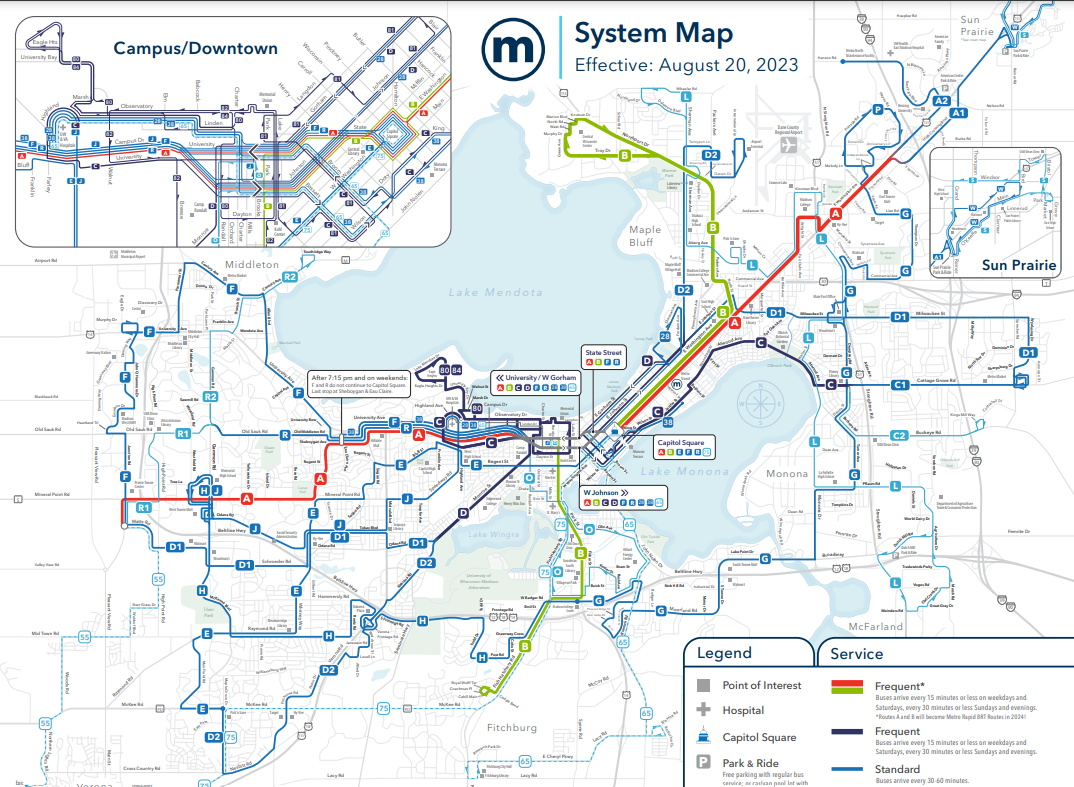

In [1]:
# Warmup 0
import os
import requests
import pandas as pd
from bs4 import BeautifulSoup

# New!
import sqlite3

In [2]:
# Take a look at this HTML Table of Volunteer Hours

<table>
    <tr> <th>Name</th><th>Week 1</th><th>Week 2</th><th>Week 3</th> </tr>
    <tr> <td>Therese</td><td>13</td><td>4</td><td>5</td> </tr>
    <tr> <td>Carl</td><td>5</td><td>7</td><td>8</td> </tr>
    <tr> <td>Marie</td><td>2</td><td>9</td><td>11</td> </tr>
</table>

In [3]:
# Warmup 1 : Parse this in Beautiful Soup

html = '''<table>
    <tr> <th>Name</th><th>Week 1</th><th>Week 2</th><th>Week 3</th> </tr>
    <tr> <td>Therese</td><td>13</td><td>4</td><td>5</td> </tr>
    <tr> <td>Carl</td><td>5</td><td>7</td><td>8</td> </tr>
    <tr> <td>Marie</td><td>2</td><td>9</td><td>11</td> </tr>
</table>'''

# set up a BeautifulSoup object
bs_obj = BeautifulSoup(html, 'html.parser')

# get the column names by finding all header elements
header_elements = bs_obj.find_all("th")
header = [e.get_text() for e in header_elements]
header

['Name', 'Week 1', 'Week 2', 'Week 3']

In [5]:
# Warmup 2: Make a dictionary mapping name to total hours

# Get all row elements, but not the first one
row_elements = bs_obj.find_all("tr") [1:]
#print(row_elements)

# make an empty dict
hours_dict = {}

# iterate through the row_elements
for row in row_elements:
    # find all "td" elements in this row
    td_elements = row.find_all("td")
    #print(td_elements)
    
    # get the name and the 3 ints
    name = td_elements[header.index("Name")].get_text()
    week1 = td_elements[header.index("Week 1")].get_text()
    week2 = td_elements[header.index("Week 2")].get_text()
    week3 = td_elements[header.index("Week 3")].get_text()
    total = int(week1) + int(week2) + int(week3)
    #print(name, total)
    
    # add the dict entry
    hours_dict[name] = total
hours_dict


{'Therese': 22, 'Carl': 20, 'Marie': 22}

## Database 1

### Learning Objectives:

- Explain how a database is different from a CSV file or a JSON file
- Use SQLite to connect to a database and pandas to query the database
- Write basic queries on a database using SELECT, FROM, WHERE, ORDER BY, and LIMIT



To start, we will go over the slides to explain what Databases and SQL are


In [6]:
# Get the Bus data from 'bus.db'

db_name = "bus.db"
assert os.path.exists(db_name)

# open a connection object to our database file
conn = sqlite3.connect(db_name)
# note: we need to close 'conn' when we are done, at the end of the notebook file
type(conn)


sqlite3.Connection

### Pandas has a function  `pd.read_sql(query, connection)`
- Allows us to process an SQL `query` on `connection`
- stores the result in a Pandas DataFrame

In [6]:
# This command helps us know the table names 
df = pd.read_sql("""
    SELECT *
    FROM sqlite_master
    WHERE type='table'
""", conn)
df


type        name    tbl_name  rootpage  \
0  table      routes      routes         2   
1  table       trips       trips         5   
2  table       stops       stops       152   
3  table  stop_times  stop_times       226   

                                                 sql  
0  CREATE TABLE routes (\n\troute_short_name TEXT...  
1  CREATE TABLE trips (\n\troute_short_name TEXT,...  
2  CREATE TABLE stops (\n\tstop_id BIGINT, \n\tst...  
3  CREATE TABLE stop_times (\n\ttrip_id BIGINT, \...

### Databases are more structured than CSV and JSON files:
- all data contained inside one or more tables
- all tables must be named, all columns must be named 
- all values in a column must be the same type

In [7]:
# This command shows how our database was set up (not part of CS220)
# Note the table names, we will use them later. Also note the column names
# Finally, note that types are more formal, different than Python, and strictly enforced

for command in df["sql"]:
    print(command)

CREATE TABLE routes (
	route_short_name TEXT, 
	route_service_name TEXT, 
	route_desc TEXT, 
	route_url TEXT, 
	route_color TEXT
)
CREATE TABLE trips (
	route_short_name TEXT, 
	trip_id BIGINT, 
	trip_headsign TEXT, 
	direction_id BIGINT, 
	trip_direction_name TEXT, 
	block_id BIGINT, 
	shape_id BIGINT, 
	shape_code TEXT, 
	wheelchair BOOLEAN
)
CREATE TABLE stops (
	stop_id BIGINT, 
	stop_name TEXT, 
	stop_desc TEXT, 
	stop_lat FLOAT, 
	stop_lon FLOAT, 
	jurisdiction_id TEXT, 
	relative_position BIGINT, 
	cardinal_direction FLOAT, 
	primary_street TEXT, 
	address_range BIGINT, 
	cross_location TEXT, 
	wheelchair BOOLEAN
)
CREATE TABLE stop_times (
	trip_id BIGINT, 
	stop_sequence BIGINT, 
	stop_id BIGINT, 
	arrival_time TEXT, 
	departure_time TEXT, 
	stop_headsign TEXT, 
	shape_dist_traveled FLOAT, 
	will_wait BOOLEAN
)


### Most basic SQL query
Select Column(s) from Table

Can use * to mean "all columns"

In [8]:
# pandas allows us to write a SQL query and create a DataFrame
pd.read_sql("select * from routes", conn)

route_short_name                         route_service_name  \
0                 A   1-SUN PRAIRIE/2-AMERICAN CENTER:JUNCTION   
1                 B                        NORTHPORT:FITCHBURG   
2                 C         1-SPRECHER/2-BUCKEYE:U.W. HOSPITAL   
3                 D    1-SPRECHER/2-AIRPORT:1-JUNCTION/2-MCKEE   
4                 E                               SQUARE:MCKEE   
5                 F                  SHEBOYGAN/SQUARE:JUNCTION   
6                 G                  EAST TOWNE:SOUTH TRANSFER   
7                 H                  SOUTH TRANSFER:WEST TOWNE   
8                 J                            PARK:WEST TOWNE   
9                 L                         CHEROKEE:OWL CREEK   
10                O                        PARK:SOUTH TRANSFER   
11                P                           HAYES:EAST TOWNE   
12                R  SHEBOYGAN/SQUARE:1-JUNCTION/2-SOUTH RIDGE   
13                S                       DOWNTOWN:SUN PRAIRIE   
14                W                      WEST MAIN:SUN PRAIRIE   
15               28                      SHERMAN:U.W. HOSPITAL   
16               38                          JENIFER:SHEBOYGAN   
17               55                       JUNCTION:EPIC CAMPUS   
18               65                    FITCHBURG:U.W. HOPSITAL   
19               75                         SQUARE:EPIC CAMPUS   
20               80                 U.W. CAMPUS:MEMORIAL UNION   
21               81                EAST JOHNSON:MEMORIAL UNION   
22               82                 OBSERVATORY:MEMORIAL UNION   
23               84                  EAGLE HEIGHTS:U.W. CAMPUS   
24               60                    EAST HIGH:NORTH MADISON   
25               61               LAFOLLETTE HIGH:EAST MADISON   
26               62                 MEMORIAL HIGH:WEST MADISON   
27               63                    WEST HIGH:SOUTH MADISON   
28               64             CAPITAL HIGH:EAST/WEST MADISON   

                                           route_desc  \
0   Monday thru Saturday daytime schedule trips op...   
1   Monday thru Saturday daytime schedule trips op...   
2   Weekday daytime schedule trips operate at leas...   
3   Weekday daytime schedule trips operate at leas...   
4   Daily schedule trips operate at least every 60...   
5   Daily schedule trips operate at least every 30...   
6   Daily schedule trips operate at least every 30...   
7   Daily schedule trips operate at least every 30...   
8   Weekday daytime schedule trips operate at leas...   
9   Daily schedule trips operate at least every 75...   
10  Daily schedule trips operate at least every 60...   
11  Daily schedule trips operate at least every 30...   
12  Daily schedule trips operate at least every 30...   
13  Daily schedule trips operate at least every 60...   
14  Weekday daytime schedule trips operate at leas...   
15  Weekday schedule trips operate at least every ...   
16  Weekday schedule trips operate at least every ...   
17  Weekday peak hour schedule trips operate at le...   
18  Weekday peak hour schedule trips operate at le...   
19  Weekday peak hour schedule trips operate at le...   
20  Daily schedule trips operate at least every 50...   
21  Daily schedule trips operate regularly every 3...   
22  Daily schedule trips operate regularly every 3...   
23  Weekday schedule trips operate at least every ...   
24  Weekday schedule trips operate limited service...   
25  Weekday schedule trips operate limited service...   
26  Weekday schedule trips operate limited service...   
27  Weekday schedule trips operate limited service...   
28  Weekday schedule trips operate limited service...   

                                            route_url route_color  
0   http://www.cityofmadison.com/metro/routes-sche...      EE3325  
1   http://www.cityofmadison.com/metro/routes-sche...      80BC00  
2   http://www.cityofmadison.com/metro/routes-sche...      333366  
3   http://www.cityofmadison.com/metro/

In [9]:
# repeat the step above but do this for stops
pd.read_sql("select * from stops", conn)

stop_id                 stop_name  \
0         435       W Johnson at N Lake   
1         670      University at N Lake   
2        1107  E Washington at S Second   
3        1164     E Washington at Aberg   
4        1233   E Washington at S Sixth   
...       ...                       ...   
1813    12407     Grandview at Kingston   
1814    12411     Grandview at Brighton   
1815    12413       Grandview at Thames   
1816    12418     Grandview at Sandwood   
1817    12452     Grandview at Brighton   

                                              stop_desc   stop_lat   stop_lon  \
0     This stop (#0435) is eastbound on the 699 bloc...  43.071921 -89.397094   
1     This stop (#0670) is westbound on the 700 bloc...  43.073336 -89.397994   
2     This stop (#1107) is eastbound on the 1999 blo...  43.093690 -89.356990   
3     This stop (#1164) is westbound on the 3098 blo...  43.106465 -89.340021   
4     This stop (#1233) is eastbound on the 2401 blo...  43.098458 -89.350651   
...                                                 ...        ...        ...   
1813  This flag stop (#W407) is northbound on the 31...  43.029623 -89.431296   
1814  This flag stop (#W411) is northbound on the 29...  43.032882 -89.430691   
1815  This flag stop (#W413) is northbound on the 28...  43.034520 -89.433097   
1816  This flag stop (#W418) is westbound on the 330...  43.026955 -89.430839   
1817  This flag stop (#W452) is southbound on the 28...  43.032747 -89.431321   

     jurisdiction_id  relative_position  cardinal_direction primary_street  \
0               CMAD                  1                90.0      W Johnson   
1               CMAD                  1               270.0     University   
2               CMAD                  3                90.0   E Washington   
3               CMAD                  1               270.0   E Washington   
4               CMAD                  1                90.0   E Washington   
...              ...                ...                 ...            ...   
1813            CMAD                  4                 0.0      Grandview   
1814            CMAD                  3                 0.0      Grandview   
1815            CMAD                  3                 0.0      Grandview   
1816            CMAD                  3               270.0      Grandview   
1817            CMAD                  3               180.0      Grandview   

      address_range cross_location  wheelchair  
0               699         N Lake           1  
1               700         N Lake           1  
2              1999       S Second           1  
3              3098          Aberg           1  
4              2401        S Sixth           1  
...             ...            ...         ...  
1813           3101       Kingston           0  
1814           2901       Brighton           0  
1815           2801         Thames           0  
1816           3301       Sandwood           0  
1817           2898       Brighton           0  

[1818 rows x 12 columns]

In [10]:
# may repeat for trips and stop times, but we'll only look at the first 2 tables
pd.read_sql("select * from trips", conn)
pd.read_sql("select * from stop_times", conn)

trip_id  stop_sequence  stop_id arrival_time departure_time  \
0       1150284              1     6455      5:15:00        5:15:00   
1       1150284              2     6987      5:16:14        5:16:14   
2       1150284              3     6837      5:18:08        5:18:08   
3       1150284              4     6349      5:19:03        5:19:03   
4       1150284              5     6755      5:20:00        5:20:00   
...         ...            ...      ...          ...            ...   
537614  1157993             30     8769     13:57:44       13:57:44   
537615  1157993             31     8131     13:58:20       13:58:20   
537616  1157993             32     6269     13:59:20       13:59:20   
537617  1157993             33     6959     14:02:00       14:02:00   
537618  1157993             34    10600     14:03:00       14:03:00   

                          stop_headsign  shape_dist_traveled  will_wait  
0       1-SUN PRAIRIE VIA HIGH CROSSING               0.0206          1  
1       1-SUN PRAIRIE VIA HIGH CROSSING               0.3469          0  
2       1-SUN PRAIRIE VIA HIGH CROSSING               0.8471          0  
3       1-SUN PRAIRIE VIA HIGH CROSSING               1.0908          0  
4       1-SUN PRAIRIE VIA HIGH CROSSING               1.3350          1  
...                                 ...                  ...        ...  
537614                   DROP OFFS ONLY               9.1337          0  
537615                   DROP OFFS ONLY               9.3018          0  
537616                   DROP OFFS ONLY               9.5803          0  
537617                   DROP OFFS ONLY              10.3164          0  
537618                   DROP OFFS ONLY              10.5171          1  

[537619 rows x 8 columns]

In [ ]:
# look at more slides

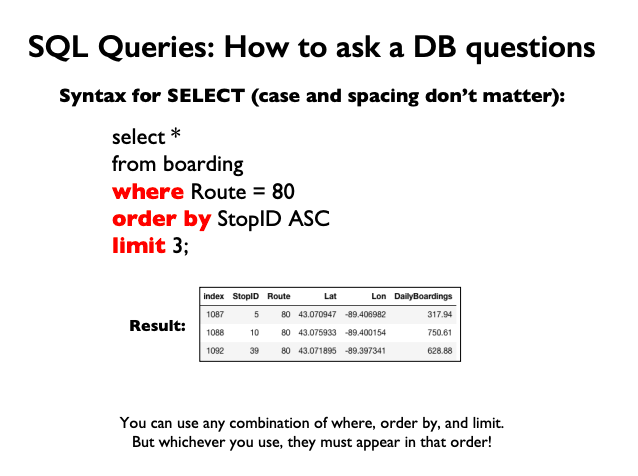

In [11]:
# more complicated queries -- What question is this answering?
# Of the stops that are eastbound, what are the top 10 southern stops?

query = """
    SELECT *  
    FROM stops  
    WHERE cardinal_direction = 90
    ORDER BY stop_lat
    LIMIT 10
"""
pd.read_sql(query, conn)

stop_id                 stop_name  \
0     4555     W Verona at Westridge   
1     4519     W Verona at Half Mile   
2     4905        W Verona at Legion   
3     4261        E Verona at S Main   
4     4623    E Verona at Enterprise   
5     4889      E Verona at Hometown   
6     4457   E Verona at Maple Grove   
7     4767   Lacy at S Fish Hatchery   
8     4385         E Cheryl at Fahey   
9     4245  E Cheryl at Woods Hollow   

                                           stop_desc   stop_lat   stop_lon  \
0  This stop (#4555) is eastbound on the 799 bloc...  42.987718 -89.552773   
1  This stop (#4519) is eastbound on the 601 bloc...  42.988306 -89.545956   
2  This stop (#4905) is eastbound on the 507 bloc...  42.989036 -89.540667   
3  This stop (#4261) is eastbound on the 101 bloc...  42.990502 -89.533087   
4  This stop (#4623) is eastbound on the 499 bloc...  42.992557 -89.526432   
5  This stop (#4889) is eastbound on the 699 bloc...  42.993736 -89.519060   
6  This stop (#4457) is eastbound on the 999 bloc...  42.994438 -89.513007   
7  This stop (#4767) is eastbound on the 5551 blo...  43.001102 -89.427420   
8  This stop (#4385) is eastbound on the 5351 blo...  43.004324 -89.412621   
9  This stop (#4245) is eastbound on the 5465 blo...  43.004808 -89.420637   

  jurisdiction_id  relative_position  cardinal_direction primary_street  \
0            CVER                  1                90.0       W Verona   
1            CVER                  3                90.0       W Verona   
2            CVER                  1                90.0       W Verona   
3            CVER                  1                90.0       E Verona   
4            CVER                  3                90.0       E Verona   
5            CVER                  3                90.0       E Verona   
6            CVER                  3                90.0       E Verona   
7            CFIT                  1                90.0           Lacy   
8            CFIT                  3                90.0       E Cheryl   
9            CFIT                  3                90.0       E Cheryl   

   address_range   cross_location  wheelchair  
0            799        Westridge           1  
1            601        Half Mile           0  
2            507           Legion           1  
3            101           S Main           1  
4            499       Enterprise           1  
5            699         Hometown           1  
6            999      Maple Grove           1  
7           5551  S Fish Hatchery           0  
8           5351            Fahey           1  
9           5465     Woods Hollow           1

In [ ]:
# Find the route service name for the "E" route
query = """
    select *
    from routes
    where route_short_name = 'E'
"""
pd.read_sql(query, conn).iloc[0]['route_service_name']

In [ ]:
# Find the stop name of the west-most bus stop

query = """
    select stop_name
    from stops
    order by stop_lon ASC
"""
pd.read_sql(query, conn).iloc[0]["stop_name"]

In [ ]:
# What are the names and descriptions of the westbound stops that are
# wheelchair-accessible and managed by the city of Sun Prarie (CSUN)?
# Order your answer by the name of the street
query = """
    select stop_name, stop_desc
    from stops
    where cardinal_direction = 270 and jurisdiction_id = 'CSUN' and wheelchair = 1
    order by primary_street ASC
"""
pd.read_sql(query, conn)

In [18]:
# What is the URL I can go to to learn more about Route J?
# Bonus: According to the website, what are the directions that it takes?
#        (You can get this data from the 8th UL element)
query = """
    SELECT *
    FROM routes
    WHERE route_short_name = 'J'
"""
url = pd.read_sql(query, conn).iloc[0]["route_url"]
url = "https://www.cityofmadison.com/metro/routes-schedules/route-80"
print(url)

https://www.cityofmadison.com/metro/routes-schedules/route-80


In [19]:
r = requests.get(url)
bus_data = r.text
bs_obj = BeautifulSoup(bus_data, 'html.parser')
bs_list = bs_obj.find_all("ul")[7]
[bs_list_item.get_text() for bs_list_item in bs_list.children]

SSLError: HTTPSConnectionPool(host='www.cityofmadison.com', port=443): Max retries exceeded with url: /metro/routes-schedules/route-80 (Caused by SSLError(SSLError(1, '[SSL: UNSAFE_LEGACY_RENEGOTIATION_DISABLED] unsafe legacy renegotiation disabled (_ssl.c:1006)')))

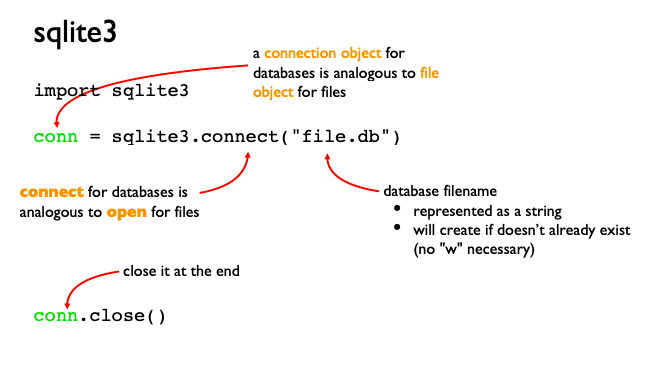

In [ ]:
# How many stops does the City of Fitchburg (CFIT) have jurisdiction over?
query = """
    select *
    from stops
    where jurisdiction_id = 'CFIT'
"""
len(pd.read_sql(query, conn))

In [ ]:
# How many stops does the City of Fitchburg (CFIT) have jurisdiction over?
query = """
    select COUNT(*) as TOTAL
    from stops
    where jurisdiction_id = 'CFIT'
""" # next time!
pd.read_sql(query, conn).iloc[0]['TOTAL']

In [20]:
# Don't forget to close your connection!
conn.close()